<a href="https://colab.research.google.com/github/Norod/my-colab-experiments/blob/master/fun_with_pokemon_stylegan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%cd /content/
!pip install typeguard
!git clone https://github.com/NVlabs/stylegan.git
%cd stylegan
!git clone https://github.com/kylemcdonald/python-utils.git utils

In [0]:
import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

from utils.imutil import imshow, imresize
from utils.mosaic import make_mosaic

tflib.init_tf()

#
# Load pre-trained network.
# This pre trained Style-GAN Pokemon network has been created by @michaelfriese10
# https://twitter.com/michaelfriese10?lang=en
#
url = 'https://s3.amazonaws.com/devopstar/resources/stylegan-pokemon/MichaelFriese10_pokemon.pkl'
with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
    _G, _D, Gs = pickle.load(f)
    # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
    # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
    # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

In [0]:
from PIL import Image

# Pick latent vector.
#random_seed = 1000
random_seed = None
rnd = np.random.RandomState(random_seed)
latents = rnd.randn(1, Gs.input_shape[1])

!mkdir './out'

mkdir: cannot create directory ‘./out’: File exists


In [0]:


qnumber_of_images = 64  #Actual number of frames is qnumber_of_images * 4

# Generate image.
all = []
counter = 0
reverse_counter = (qnumber_of_images * 2) - 1
latent_vectors_1 = (np.logspace(-8,1,num = qnumber_of_images, base=2.0) - 2)
latent_vectors_2 = np.absolute(np.flip(latent_vectors_1))
latent_vectors = latent_vectors_1 + latent_vectors_2
for i in latent_vectors:
  print(i)
  fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
  images = Gs.run(latents, None, truncation_psi=i, randomize_noise=True, output_transform=fmt)
  all.append(images[0])
  im = Image.fromarray(images[0])
  im.save('./out/StyleGanImg_' + str(counter) + '.jpg')
  if (reverse_counter > counter):
    im.save('./out/StyleGanImg_' + str(reverse_counter) + '.jpg')
  counter = counter + 1
  reverse_counter = reverse_counter - 1
  

-1.99609375
-1.8071344788650234
-1.6359089399285387
-1.480736866509478
-1.3400955274404152
-1.2126047842356649
-1.0970135475467502
-0.9921875
-0.8970979649383297
-0.8108118118341652
-0.7324822993135338
-0.6613407659322954
-0.5966890871646184
-0.5378928245827825
-0.484375
-0.43561043348079975
-0.3911205896568739
-0.3504688817743564
-0.313256387390324
-0.2791179336758802
-0.24771851391020583
-0.21875
-0.19192811876366989
-0.1669896623080196
-0.14368990512235746
-0.12180020254351476
-0.10110574702508224
-0.08140346019273248
-0.0625
-0.04420986342837496
-0.026353566113175075
-0.008755881031536905
0.008755881031536905
0.026353566113175075
0.04420986342837496
0.0625
0.08140346019273248
0.10110574702508224
0.12180020254351476
0.14368990512235746
0.1669896623080196
0.19192811876366989
0.21875
0.24771851391020583
0.2791179336758802
0.313256387390324
0.3504688817743564
0.3911205896568739
0.43561043348079975
0.484375
0.5378928245827825
0.5966890871646184
0.6613407659322954
0.7324822993135338
0.81

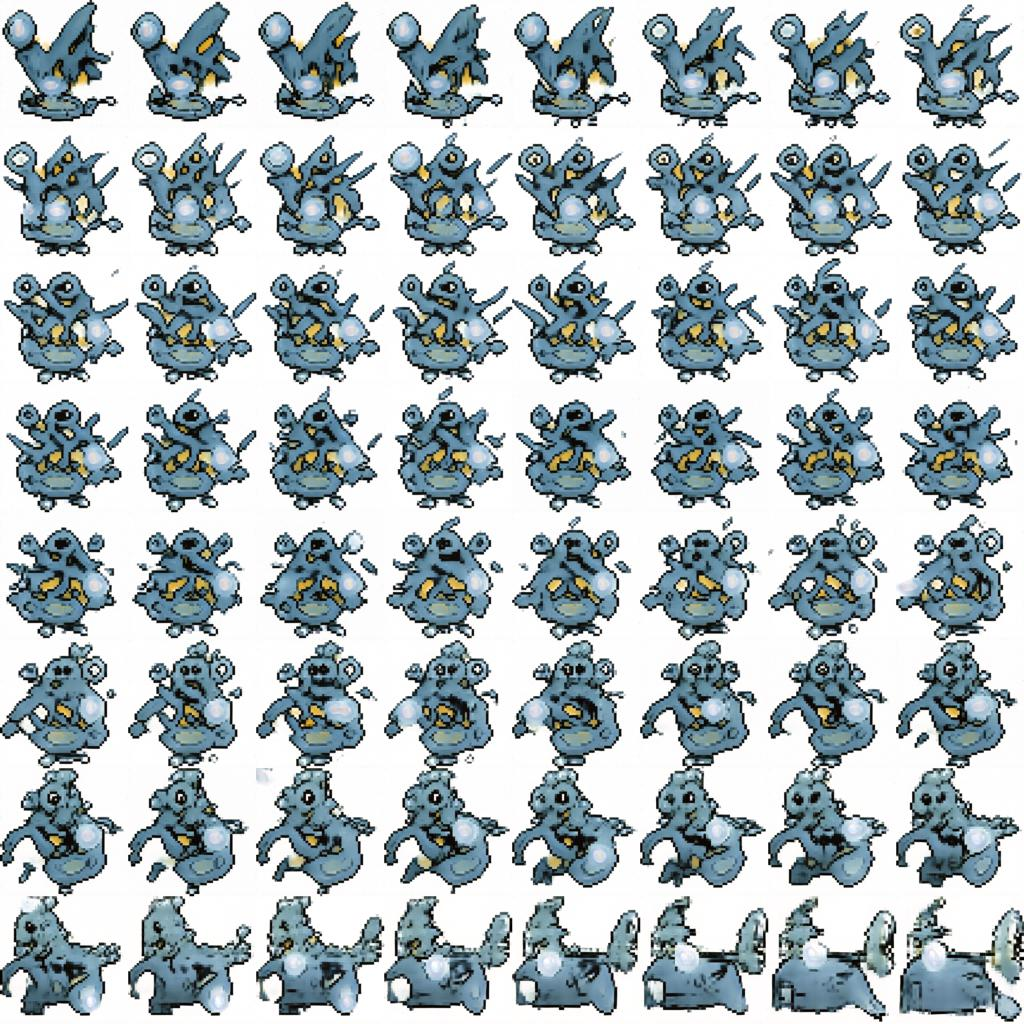

In [0]:
mosaic = make_mosaic(np.asarray(all))
mosaic = imresize(mosaic, max_side=1024) # comment this out for higher res
imshow(mosaic, retina=True, fmt='jpg')

In [0]:
!ffmpeg -f image2  -framerate 8 -i "./out/StyleGanImg_%01d.jpg" -b:v 8192k -r 30 -y -c:v libx264 StyleGanImg_all.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena

In [0]:
!ls -latr /content/stylegan/StyleGanImg_all.mp4

from IPython.display import HTML
from base64 import b64encode
mp4 = open('StyleGanImg_all.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=512 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

-rw-r--r-- 1 root root 4677278 Dec 25 07:56 /content/stylegan/StyleGanImg_all.mp4


In [0]:
#import shutil
#shutil.make_archive('StyleGanImg_all', 'zip', './out/')

#!rm -rf './out'